In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import pandas as pd
import theano

#### Start Presidential Model

In [8]:
time = pd.read_csv('TimeForAChange.csv')

In [73]:
time.head()

,Year,Q1GDP,Q2GDP,June Net Approval,Incumbent Present,Incumbent 2+ Terms,Polarization,Incumbent Party Vote Share
0,2016,0.8,1.2,6.0,0,1,1,51.1
1,2012,2.0,1.3,-0.8,1,0,1,52.0
2,2008,-1.8,3.3,-30.0,0,1,-1,46.3
3,2004,2.7,2.6,-0.5,1,0,1,51.2
4,2000,1.1,8.0,19.5,0,1,1,50.3


In [21]:
potus_results = pd.read_csv('potus_results.csv')

In [22]:
potus_results #need to convert this to incumbant/ non-incumbant

,year,state,total_votes,dem,rep,other
0,1976,AK,123574,0.356531,0.579046,0.054906
1,1976,AL,1182850,0.557273,0.426149,0.016318
2,1976,AR,767535,0.649617,0.349043,0.001339
3,1976,AZ,742719,0.398000,0.563661,0.038309
4,1976,CA,7803770,0.479548,0.497483,0.022969
...,...,...,...,...,...,...
556,2016,VT,320467,0.557227,0.297594,0.073724
557,2016,WA,3317019,0.525387,0.368327,0.073786
558,2016,WI,2976150,0.464538,0.472182,0.059118
559,2016,WV,713051,0.264769,0.686306,0.048925


In [23]:
potus_results['incumbent'] = np.nan

In [24]:
potus_result_1976 = potus_results.query("year == 1976")

In [26]:
potus_result_1976['incumbent'] = potus_result_1976['rep']

/opt/anaconda3/envs/Bayes/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
potus_result_1980 = potus_results.query("year == 1980")
potus_result_1980['incumbent'] = potus_result_1980.loc[:, "dem"]

/opt/anaconda3/envs/Bayes/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
potus_result_1984 = potus_results.query("year == 1984")
potus_result_1984['incumbent'] = potus_result_1984.loc[:, "rep"]

/opt/anaconda3/envs/Bayes/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
potus_result_1988 = potus_results.query("year == 1988")
potus_result_1988['incumbent'] = potus_result_1988.loc[:, "rep"]

/opt/anaconda3/envs/Bayes/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
potus_result_1992 = potus_results.query("year == 1992")
potus_result_1992['incumbent'] = potus_result_1992.loc[:, "rep"]

/opt/anaconda3/envs/Bayes/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
potus_result_1996 = potus_results.query("year == 1996")
potus_result_1996['incumbent'] = potus_result_1996.loc[:, "dem"]

/opt/anaconda3/envs/Bayes/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
potus_result_2000 = potus_results.query("year == 2000")
potus_result_2000['incumbent'] = potus_result_2000.loc[:, "dem"]

/opt/anaconda3/envs/Bayes/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
potus_result_2004 = potus_results.query("year == 2004")
potus_result_2004['incumbent'] = potus_result_2004.loc[:, "rep"]

/opt/anaconda3/envs/Bayes/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
potus_result_2008 = potus_results.query("year == 2008")
potus_result_2008['incumbent'] = potus_result_2008.loc[:, "rep"]

/opt/anaconda3/envs/Bayes/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
potus_result_2012 = potus_results.query("year == 2012")
potus_result_2012['incumbent'] = potus_result_2012.loc[:, "dem"]

/opt/anaconda3/envs/Bayes/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
potus_result_2016 = potus_results.query("year == 2016")
potus_result_2016['incumbent'] = potus_result_2016.loc[:, "dem"]

/opt/anaconda3/envs/Bayes/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
potus_results = pd.concat([potus_result_1976, potus_result_1980, potus_result_1984,
                          potus_result_1988, potus_result_1992, potus_result_1996,
                          potus_result_2000, potus_result_2004, potus_result_2008,
                          potus_result_2012, potus_result_2016])

In [59]:
potus_results.head()

,year,state,total_votes,dem,rep,other,incumbent
0,1976,AK,123574,0.356531,0.579046,0.054906,0.579046
1,1976,AL,1182850,0.557273,0.426149,0.016318,0.426149
2,1976,AR,767535,0.649617,0.349043,0.001339,0.349043
3,1976,AZ,742719,0.398000,0.563661,0.038309,0.563661
4,1976,CA,7803770,0.479548,0.497483,0.022969,0.497483


In [75]:
states = potus_results.state.unique()
n_states = len(states)
state_idx = np.arange(51)

In [76]:
states_index = pd.DataFrame(states, index=state_idx, columns=['States'])

In [53]:
state_mapper = dict(zip(states_index.States, states_index.index))

In [60]:
potus_results['state_idx'] = potus_results.state.map(state_mapper)

In [61]:
potus_results.head()

,year,state,total_votes,dem,rep,other,incumbent,state_idx
0,1976,AK,123574,0.356531,0.579046,0.054906,0.579046,0
1,1976,AL,1182850,0.557273,0.426149,0.016318,0.426149,1
2,1976,AR,767535,0.649617,0.349043,0.001339,0.349043,2
3,1976,AZ,742719,0.398000,0.563661,0.038309,0.563661,3
4,1976,CA,7803770,0.479548,0.497483,0.022969,0.497483,4


In [62]:
state_idx = potus_results.state_idx.values

In [48]:
time = pd.read_csv('TimeForAChange.csv', index_col=0)

In [49]:
time.head()

,Year,Q1GDP,Q2GDP,June Net Approval,Incumbent Present,Incumbent 2+ Terms,Polarization,Incumbent Party Vote Share
0,2016,0.8,1.2,6.0,0,1,1,51.1
1,2012,2.0,1.3,-0.8,1,0,1,52.0
2,2008,-1.8,3.3,-30.0,0,1,-1,46.3
3,2004,2.7,2.6,-0.5,1,0,1,51.2
4,2000,1.1,8.0,19.5,0,1,1,50.3


In [54]:
evan_pct = pd.read_csv('white_evangel_pct.csv')
evan_pct['state_idx'] = evan_pct.state.map(state_mapper)

In [57]:
evan_pct = evan_pct.sort_values('state_idx')
evan_pct.head()

,state,pct_white_evangel,state_idx
26,AK,0.224529,0
5,AL,0.420185,1
1,AR,0.447923,2
35,AZ,0.158766,3
41,CA,0.103984,4


In [63]:
potus_results['pct_white_evangel'] = potus_results['state'].map(dict(zip(evan_pct.state, evan_pct.pct_white_evangel)))

In [66]:
potus_results['Q2GDP'] = potus_results.year.map(dict(zip(time.Year, time.Q2GDP)))
potus_results['JNA'] = potus_results.year.map(dict(zip(time.Year, time['June Net Approval'])))
potus_results['I2T'] = potus_results.year.map(dict(zip(time.Year, time['Incumbent 2+ Terms'])))

In [67]:
with pm.Model() as hierarchical_model:
    # Hyperpriors for group nodes
    mu_a = pm.Normal('mu_a', mu=0., sigma=100)
    sigma_a = pm.HalfNormal('sigma_a', 5.)
    mu_b = pm.Normal('mu_b', mu=0., sigma=100)
    sigma_b = pm.HalfNormal('sigma_b', 5.)

    a = pm.Normal('a', mu=mu_a, sigma=sigma_a, shape=n_states)
    # Intercept for each state, distributed around group mean mu_a
    b1 = pm.Normal('b1', mu=mu_b, sigma=sigma_b, shape=n_states)
    b_Q2GDP = pm.Normal('b_Q2GDP', mu=mu_b, sigma=sigma_b)
    b_JNA = pm.Normal('b_JNA', mu=mu_b, sigma=sigma_b)
    b_I2T = pm.Normal('b_I2T', mu=mu_b, sigma=sigma_b)
    
    # Model error
    eps = pm.HalfCauchy('eps', 5.)

    expected_vote = a[state_idx] + b1[state_idx]*potus_results.pct_white_evangel + b_Q2GDP*potus_results.Q2GDP + \
    b_JNA*potus_results.JNA + b_I2T*potus_results.I2T

    # Data likelihood
    vote_share_like = pm.Normal('vote_share_like', mu=expected_vote,
                           sigma=eps, observed=potus_results.incumbent)

In [71]:
with hierarchical_model:
    hierarchical_trace = pm.sample(10000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [eps, b_I2T, b_JNA, b_Q2GDP, b1, a, sigma_b, mu_b, sigma_a, mu_a]
Sampling 2 chains, 3,316 divergences: 100%|██████████| 22000/22000 [01:54<00:00, 191.55draws/s]
There were 807 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2509 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.488794747605988, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.


/opt/anaconda3/envs/Bayes/lib/python3.6/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/envs/Bayes/lib/python3.6/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/envs/Bayes/lib/python3.6/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/anaconda3/envs/Bayes/lib/python3.6/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupp

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0c84f7828>,
      dtype=object)

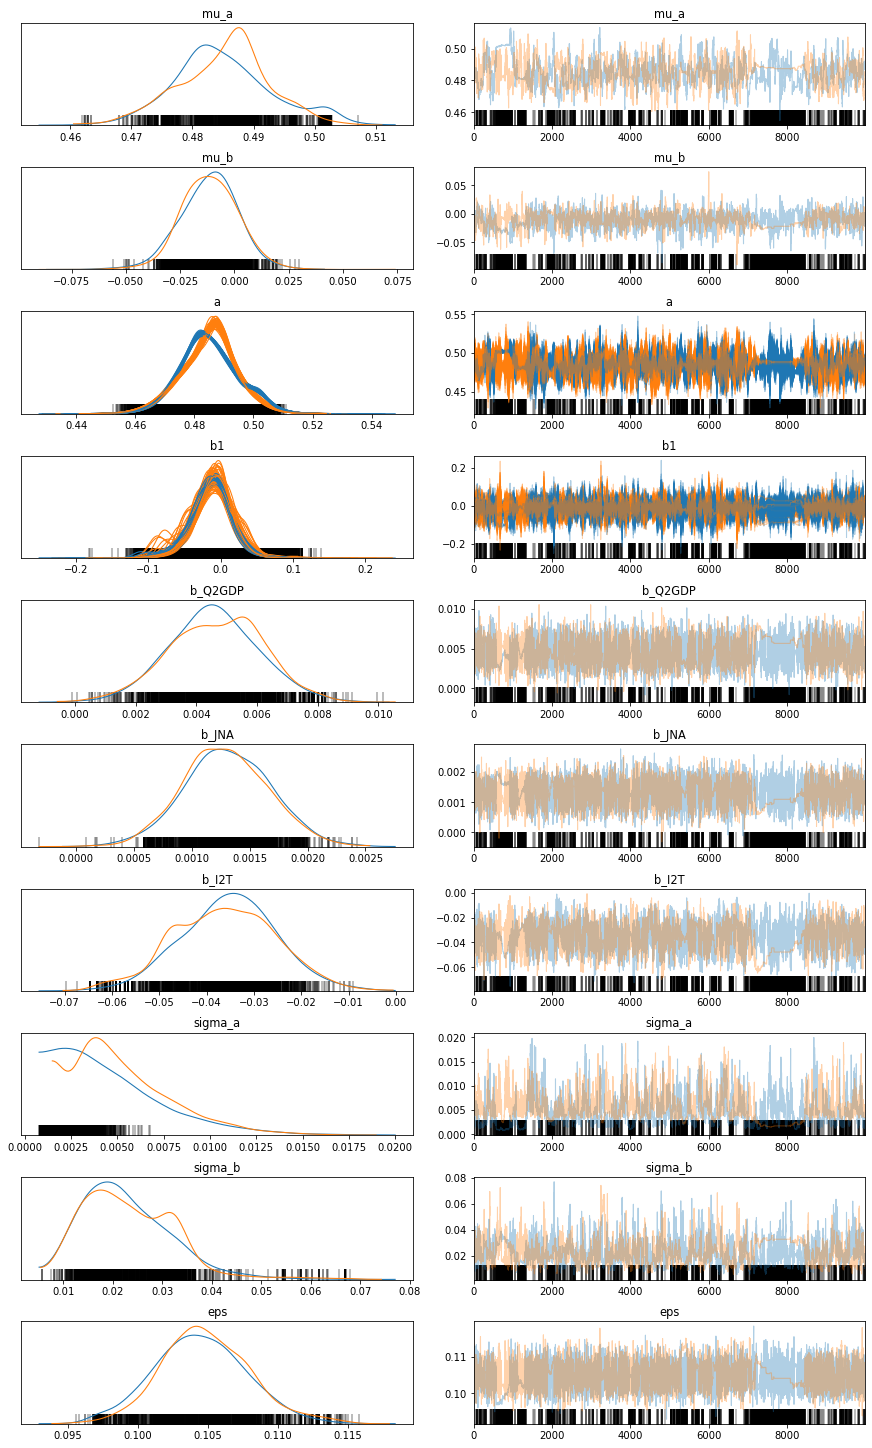

In [72]:
pm.traceplot(hierarchical_trace)